# **DATA SCIENCE TEST**

In [21]:
# LOAD THE REQUIEREMENTS 

# I checked warnings, but for the final report I prefer ignore those 
#that really does not affect the results (warnings of libraries, etc)
import warnings
warnings.simplefilter('ignore')

# Load the functions that are necessary for the task

#python
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datatable as dt

#Sometimes I will use R functions (those I believe are the best ones)
# Load in the r magic
%load_ext rpy2.ipython


# my own functions
#-------------------

# PYTHON
#--------
# I did not use functions this time

#R
#---
#%R source('utils/Rgraphs.R')
# check if the packages are installed: if not: install and load, else: load 
%R source('utils/install_load_libraries.R') 

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


value,[RTYPES.VECSXP]
visible,[RTYPES.LGLSXP]


In [22]:
%%R 

#functions of R created by me and use it in this notebook: in Rgraphs.R - loaded before
bar_plot <- function(dataset, var){
    require(forcats)
    dataset_copy = copy(dataset)
    setnames(dataset_copy, var, 'var')
    d <- ggplot(dataset_copy, aes(fct_rev(fct_infreq(var)))) + geom_bar() + coord_flip()
    d <- d + ylab(var) + xlab('Frequency') 
    d <- d + theme_tq() 
    d <- d + theme(axis.title.y = element_text(size = rel(1.5)))
    d <- d + theme(axis.text.y = element_text(size = rel(1.8)))
    d <- d + theme(axis.text.x = element_text(size = rel(1.8)))
    d <- d + theme(axis.title.x = element_text(size = rel(1.5)))
    d <- d + theme(legend.text = element_text(size = 15))
    d <- d + theme(legend.title = element_text(size = 15))
    d <- d +  theme(
        panel.background = element_rect(fill="white") ,
        panel.grid.minor.y = element_line(size=3),
        panel.grid.major = element_line(colour = "lightgray"),
        plot.background = element_rect(fill="white")
      )

    d
    return(d)
}


#in install_load_libraries.R: loaded before
# Required packages list
packages <- c(
    'data.table',
    'dplyr',
    'ggplot2',
    'Metrics',
    'corrr',
    'tidygraph',
    'cowplot',
    'tabplot',
    'tidyquant',
    'gridExtra',
    'ggpubr',
    'tm',
    'wordcloud',
'forcats',
'rtweet'    
) 
  
# Install packages not found in local machine
if(any(!(packages %in% installed.packages()))){
  install.packages(packages[!(packages %in% installed.packages())])
}

# Require all packages
result <- suppressMessages(lapply(packages, require, character.only = TRUE))



## **GOAL**:

Generate insights that help to increase engagement with Olympic Channel content on social media.


## **EXPLORATORY ANALYSIS**

In [5]:
# LOAD DATA with data.tables in python
import os
path = os.getcwd()
datatable_df = dt.fread(path + '/data/test_ds.csv')
datatable_df.head()

,channel,content_type,tag,ch2_likes,ch2_shares,ch2_comments,ch2_views,ch2_impressions,ch1_likes,ch1_shares,…,ch3_comments,ch3_likes,ch3_impressions,published_date,id
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,Channel2,Country,Norway,125,23,5,8359,79332,0,0,…,0,0,0,2019-01-01,205162281
1,Channel2,Sport,Ski Jumping,125,23,5,8359,79332,0,0,…,0,0,0,2019-01-01,205162281
2,Channel2,Format,Video,125,23,5,8359,79332,0,0,…,0,0,0,2019-01-01,205162281
3,Channel1,Country,Norway,0,0,0,0,0,51,15,…,0,0,0,2019-01-01,205162315
4,Channel1,Sport,Ski Jumping,0,0,0,0,0,51,15,…,0,0,0,2019-01-01,205162315
5,Channel1,Format,Video,0,0,0,0,0,51,15,…,0,0,0,2019-01-01,205162315
6,Channel1,Sport,Swimming,0,0,0,0,0,21,2,…,0,0,0,2019-01-01,205163332
7,Channel1,Country,Denmark,0,0,0,0,0,21,2,…,0,0,0,2019-01-01,205163332
8,Channel1,Format,GFX,0,0,0,0,0,21,2,…,0,0,0,2019-01-01,205163332


In [6]:
dataset = datatable_df.to_pandas()
dataset_original = dataset.copy()
dataset.columns

Index(['channel', 'content_type', 'tag', 'ch2_likes', 'ch2_shares',
       'ch2_comments', 'ch2_views', 'ch2_impressions', 'ch1_likes',
       'ch1_shares', 'ch1_comments', 'ch3_views', 'ch3_comments', 'ch3_likes',
       'ch3_impressions', 'published_date', 'id'],
      dtype='object')

## **Duplicated Data**

In [7]:
%%R -i dataset
dataset %>% filter(id == '205162281') %>% head()
#dataset %>% filter(published_date == '2019-01-01') 

   channel content_type         tag ch2_likes ch2_shares ch2_comments ch2_views
1 Channel2      Country      Norway       125         23            5      8359
2 Channel2        Sport Ski Jumping       125         23            5      8359
3 Channel2       Format       Video       125         23            5      8359
  ch2_impressions ch1_likes ch1_shares ch1_comments ch3_views ch3_comments
1           79332         0          0            0         0            0
2           79332         0          0            0         0            0
3           79332         0          0            0         0            0
  ch3_likes ch3_impressions published_date        id
1         0               0     2019-01-01 205162281
2         0               0     2019-01-01 205162281
3         0               0     2019-01-01 205162281


### In the summary we can see that we have content that does not generate any engagement. Would be interesting to see in this is due to the channel where the content was exposed.

In [8]:
#quick revie of the data
dataset.describe()

,ch2_likes,ch2_shares,ch2_comments,ch2_views,ch2_impressions,ch1_likes,ch1_shares,ch1_comments,ch3_views,ch3_comments,ch3_likes,ch3_impressions,id
count,8943.000000,8943.000000,8943.000000,8.943000e+03,8.900000e+03,8.943000e+03,8943.000000,8943.000000,8943.000000,8843.000000,8943.000000,8943.000000,8.943000e+03
mean,503.770994,93.771330,30.017891,1.848492e+04,6.844956e+04,1.118710e+05,32.519848,2.693839,1083.946998,5.711071,391.510120,9175.708599,2.099270e+08
std,7564.459219,1935.155686,502.060871,1.799119e+05,5.700620e+05,1.046278e+07,187.971446,32.995187,7113.850732,47.444334,1177.497535,25365.298196,2.443514e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.051623e+08
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.077566e+08
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.102335e+08
75%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,4.900000e+01,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.119940e+08
max,241209.000000,66112.000000,24637.000000,4.921604e+06,1.653592e+07,9.894000e+08,5000.000000,997.000000,292544.000000,1240.000000,34383.000000,785487.000000,2.137215e+08


### We have data from 2019. From January to June

In [9]:
#categorical
dataset.describe(include=['object', 'bool'])

,channel,content_type,tag,published_date
count,8943,8943,8943,8943
unique,3,3,163,153
top,Channel1,Sport,Video,2019-04-26
freq,4712,3043,1491,204


### The percentage of missing data is too small, that we ignore this

In [10]:
#see null rows
null_data = dataset[dataset.isnull().any(axis=1)]
null_data.head() # could nan data means that there are not comments

,channel,content_type,tag,ch2_likes,ch2_shares,ch2_comments,ch2_views,ch2_impressions,ch1_likes,ch1_shares,ch1_comments,ch3_views,ch3_comments,ch3_likes,ch3_impressions,published_date,id
91,Channel1,Country,United States Of America,0,0,0,0,0.0,61,13,5,0,NaN,0,0,2019-01-02,205234993
145,Channel2,Sport,Skeleton,40,1,0,6956,51559.0,0,0,0,0,NaN,0,0,2019-01-03,205319391
217,Channel3,Country,Japan,0,0,0,0,NaN,0,0,0,0,11.0,1256,48009,2019-01-05,205449444
283,Channel1,Sport,Handball,0,0,0,0,0.0,100,20,5,0,NaN,0,0,2019-01-06,205480675
335,Channel1,Format,Video,0,0,0,0,NaN,80,19,2,0,0.0,0,0,2019-01-07,205509248


In [11]:
# Percentage of missings in each variables
missing = (dataset.isnull().sum(axis = 0)/dataset.shape[0])*100
missing = missing.apply(pd.to_numeric)
missing= pd.DataFrame(missing)
missing

,0
channel,0.000000
content_type,0.000000
tag,0.000000
ch2_likes,0.000000
ch2_shares,0.000000
ch2_comments,0.000000
ch2_views,0.000000
ch2_impressions,0.480823
ch1_likes,0.000000
ch1_shares,0.000000


In [12]:
# compleTE nas with zeros: we will assume that the values are zero.
dataset = dataset.fillna(0)

### The data need to be transformed to the correct type. For example date

In [13]:
dataset.dtypes

channel             object
content_type        object
tag                 object
ch2_likes            int32
ch2_shares           int32
ch2_comments         int32
ch2_views            int32
ch2_impressions    float64
ch1_likes            int32
ch1_shares           int32
ch1_comments         int32
ch3_views            int32
ch3_comments       float64
ch3_likes            int32
ch3_impressions      int32
published_date      object
id                   int32
dtype: object

### TO AVOID PROBLEMS OF UPPERCASE AND LOWERCASE OR MIXED WE PUT ALL THE NAMES IN UPPERCASE

In [14]:
# all in uppercase
dataset[['channel', 'content_type', 'tag']] = dataset[['channel', 'content_type', 'tag']].apply(lambda x: x.astype(str).str.upper())

### We can see that Channel 1 has more content that the other channels. There is the same proportion of content for the categories: sports, country and format

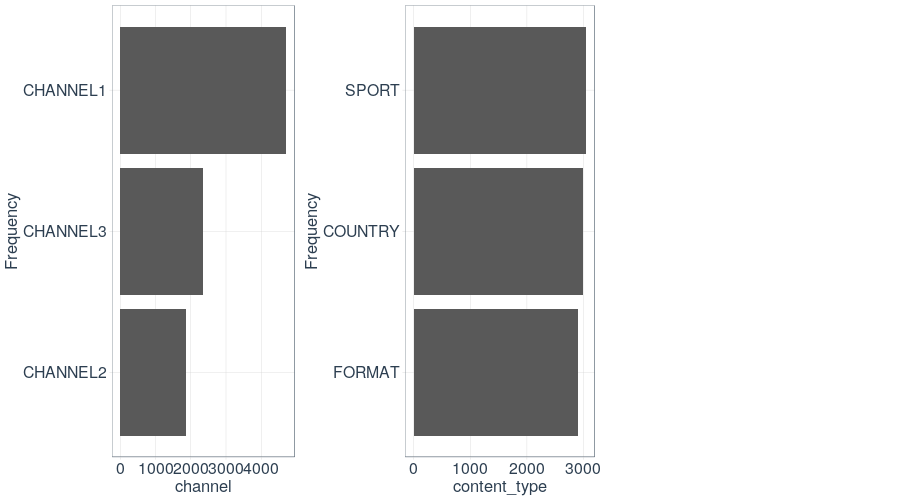

In [15]:
%%R -i dataset -w 900 -h 500 -u px

d_channel = bar_plot(dataset, var = 'channel') 
d_content_type = bar_plot(dataset, var = 'content_type') 
d_tag = bar_plot(dataset, var = 'tag') 
gridExtra::grid.arrange(d_channel, d_content_type, ncol= 3)  

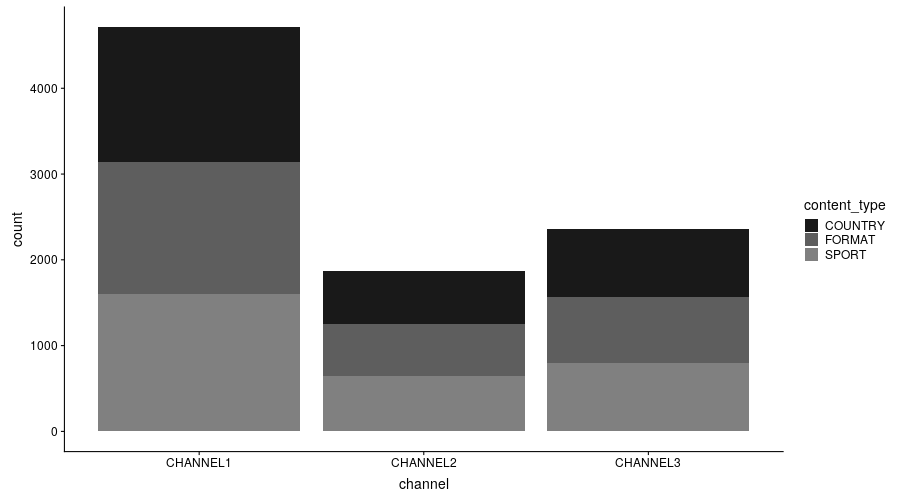

In [16]:
%%R -i dataset -w 900 -h 500 -u px

ggplot(dataset, aes(x = channel, fill = content_type)) + geom_bar() + scale_fill_grey(start = 0.1, end = .5) 

## There are a lot of content related with tags: VIDEO, NON SPECIFIC COUNTRY, PICTURE

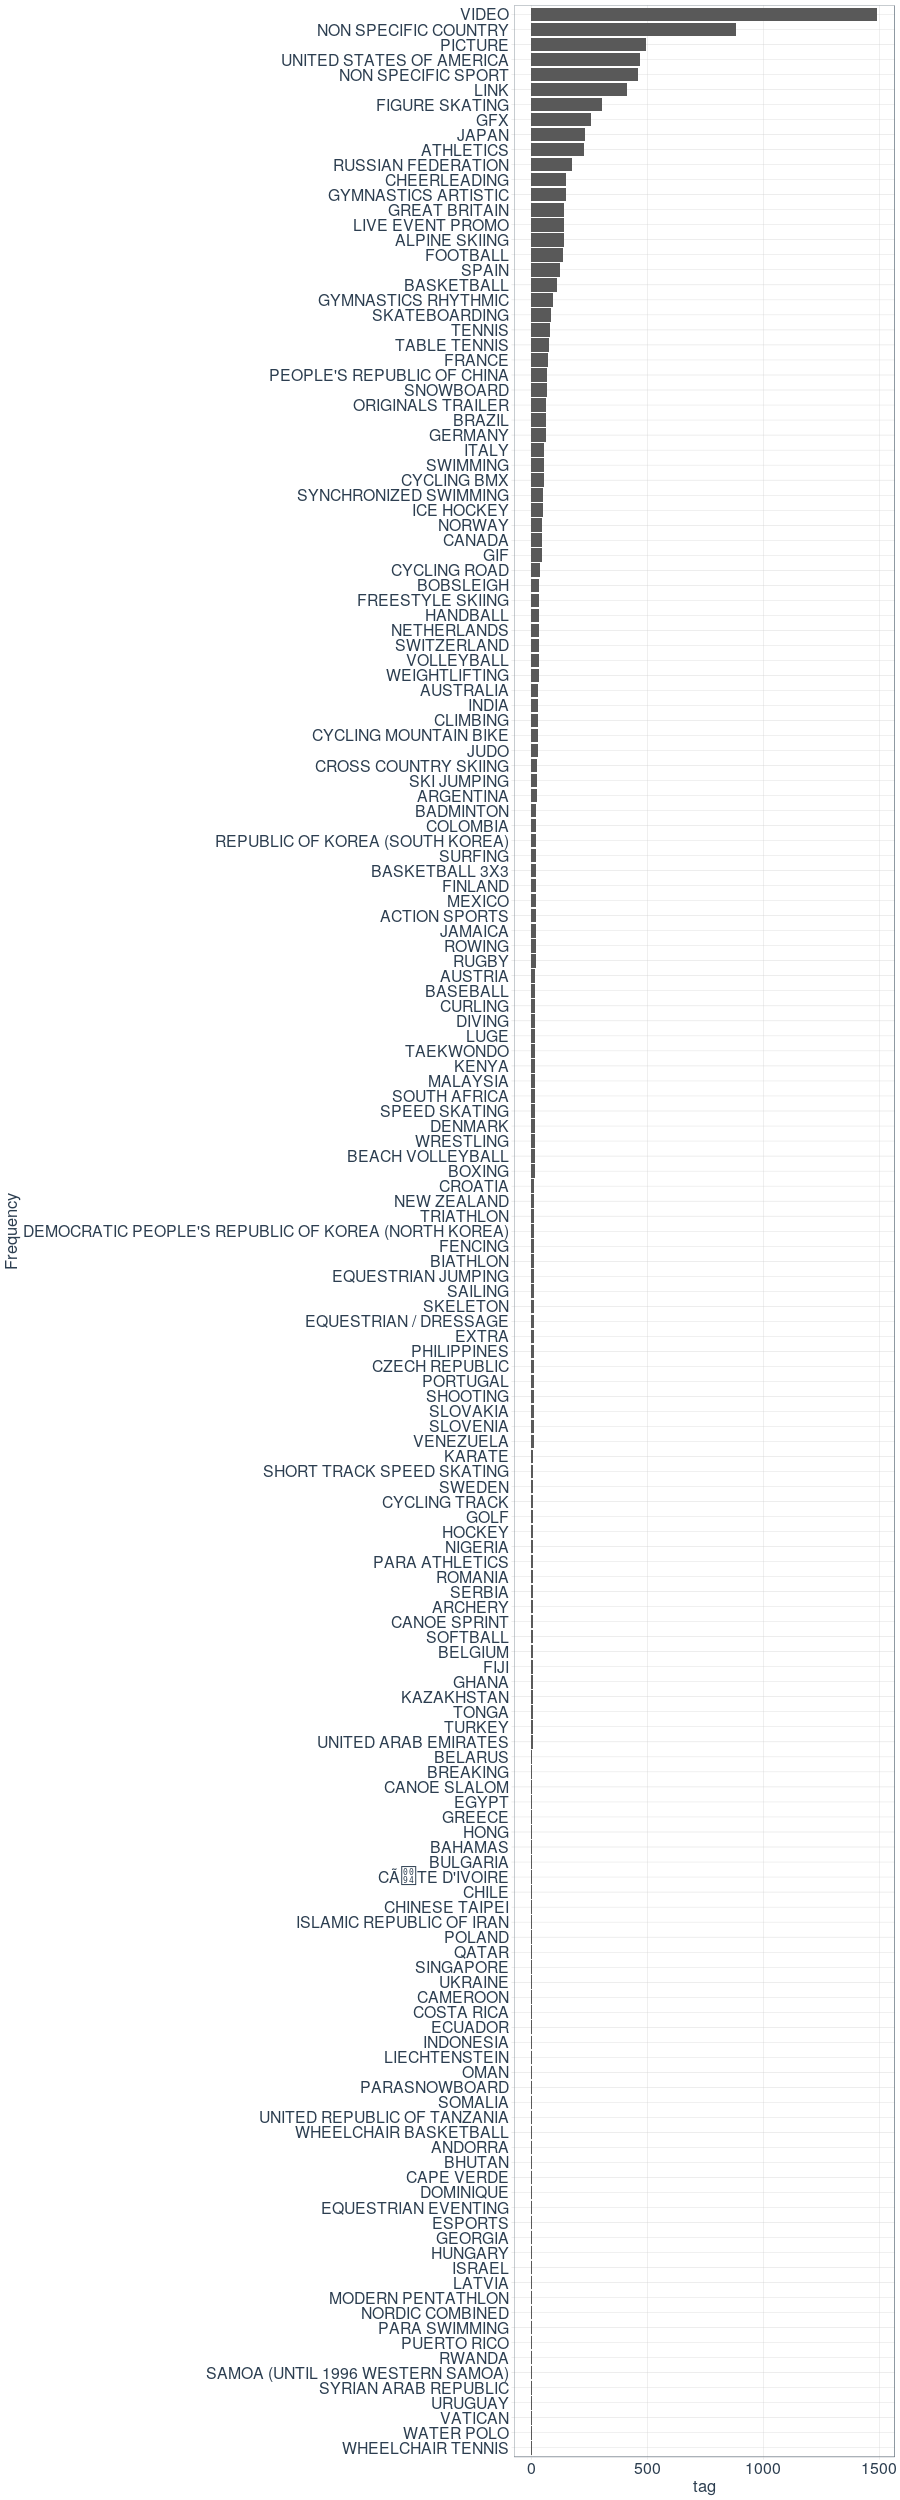

In [17]:
%%R -i dataset -w 900 -h 2500 -u px

d_tag = bar_plot(dataset, var = 'tag') 
d_tag

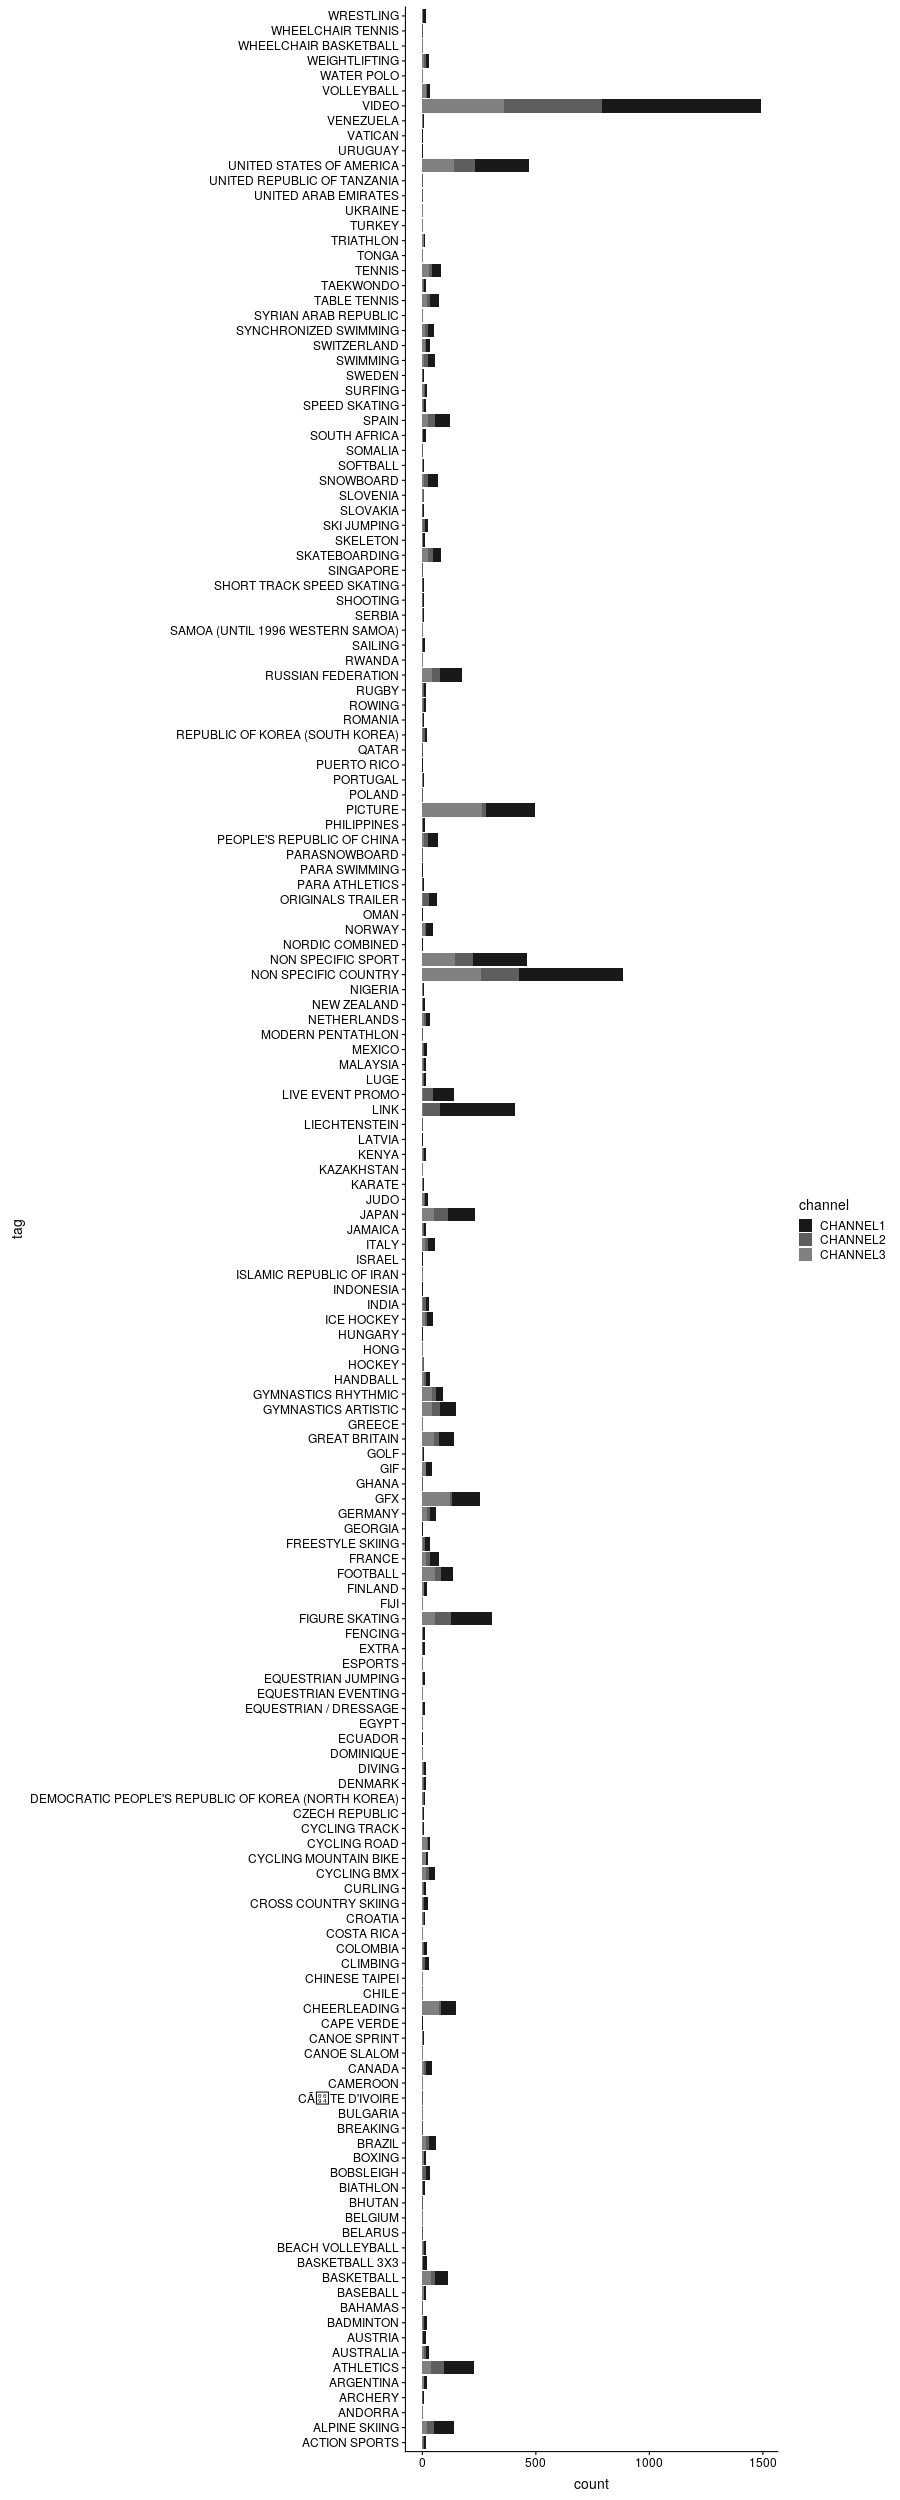

In [18]:
%%R -i dataset -w 900 -h 2500 -u px

ggplot(dataset, aes(x = tag, fill = channel)) + geom_bar() + scale_fill_grey(start = 0.1, end = .5) + coord_flip() #content_type

## **fuzzywuzzy: string match similarities**
To check if thre are misspelling in the tags. This allows to see if there are similarities between categories.

There are other alternatives more realted with spelling like:

from textblob import TextBlob

df['Company'] = df['Company'].apply(lambda tweet: TextBlob(tweet).correct())

In [20]:
#check similarities between variables (do not forget eliminate duplicates)
from fuzzywuzzy import fuzz
import pandas as pd
import numpy as np

dataframecolumn = pd.DataFrame(dataset['tag'])
dataframecolumn.columns = ['Match']
compare = pd.DataFrame(dataset['tag'])
compare.columns = ['compare']
dataframecolumn['Key'] = 1
compare['Key'] = 1
print(compare.shape)

#we will take only the first 2000
compare = compare.iloc[:2000,:]
dataframecolumn = dataframecolumn.iloc[:2000,:]
combined_dataframe = dataframecolumn.merge(compare,on="Key",how="left")
combined_dataframe = combined_dataframe[~(combined_dataframe.Match==combined_dataframe.compare)]
def partial_match(x,y):
    return(fuzz.ratio(x,y))
print('Please wait: This will take a little bit ...')
partial_match_vector = np.vectorize(partial_match)
combined_dataframe['score']=partial_match_vector(combined_dataframe['Match'],combined_dataframe['compare'])
combined_dataframe = combined_dataframe[combined_dataframe.score>=80]
combined_dataframe

(8943, 2)
Please wait: This will take a little bit ...


,Match,Key,compare,score
37253,CYCLING ROAD,1,CYCLING TRACK,80
45253,CYCLING ROAD,1,CYCLING TRACK,80
263399,BASKETBALL,1,BASKETBALL 3X3,83
263403,BASKETBALL,1,BASKETBALL 3X3,83
263623,BASKETBALL,1,BASKETBALL 3X3,83
...,...,...,...,...
3835399,BASKETBALL,1,BASKETBALL 3X3,83
3835403,BASKETBALL,1,BASKETBALL 3X3,83
3835623,BASKETBALL,1,BASKETBALL 3X3,83
3835689,BASKETBALL,1,BASEBALL,89


## eliminate duplicated data

In [23]:
dataset = dataset.drop_duplicates(subset=['channel', 'ch2_likes', 'ch2_shares', 'ch2_comments', 'ch2_views',
                                'ch2_impressions', 'ch1_likes', 'ch1_shares', 'ch1_comments', 'ch3_views',
                                'ch3_comments', 'ch3_likes', 'ch3_impressions', 'published_date', 'id'], keep='first')
dataset.head()

,channel,content_type,tag,ch2_likes,ch2_shares,ch2_comments,ch2_views,ch2_impressions,ch1_likes,ch1_shares,ch1_comments,ch3_views,ch3_comments,ch3_likes,ch3_impressions,published_date,id
0,CHANNEL2,COUNTRY,NORWAY,125,23,5,8359,79332.0,0,0,0,0,0.0,0,0,2019-01-01,205162281
3,CHANNEL1,COUNTRY,NORWAY,0,0,0,0,0.0,51,15,0,0,0.0,0,0,2019-01-01,205162315
6,CHANNEL1,SPORT,SWIMMING,0,0,0,0,0.0,21,2,0,0,0.0,0,0,2019-01-01,205163332
9,CHANNEL1,COUNTRY,NORWAY,0,0,0,0,0.0,49,7,0,0,0.0,0,0,2019-01-01,205164246
15,CHANNEL1,FORMAT,GFX,0,0,0,0,0.0,17,2,0,0,0.0,0,0,2019-01-01,205164431


## **create new variables: number of post per day**

In [24]:
#NUmber of posts
#dataset[['published_date', 'channel', 'id', 'content_type']].groupby(['published_date', 'channel', 'content_type']).count().reset_index().head()
dataset_group_day = dataset[['published_date', 'channel', 'id']].groupby(['published_date', 'channel']).count().reset_index()
dataset_group_day.columns = ['published_date', 'channel', 'number_posts_day']
dataset_group_day['published_date'] = pd.to_datetime(dataset_group_day['published_date'], format='%Y/%m/%d')
dataset_group_day['Month'] = dataset_group_day['published_date'].dt.month
dataset_group_day.head()

,published_date,channel,number_posts_day,Month
0,2019-01-01,CHANNEL1,16,1
1,2019-01-01,CHANNEL2,3,1
2,2019-01-02,CHANNEL1,6,1
3,2019-01-02,CHANNEL2,3,1
4,2019-01-02,CHANNEL3,3,1


## **wide/long format**

In [25]:
#change the direction of the dataset --> long format
dataset_long = pd.melt(dataset, id_vars=['channel', 'content_type', 'tag', 'id', 'published_date'])

In [26]:
# data only from 2019 until june
from datetime import datetime
dataset_long['published_date'] = pd.to_datetime(dataset_long['published_date'], format='%Y/%m/%d')
dataset_long['Month'] = dataset_long['published_date'].dt.month
dataset_long['year'] = dataset_long['published_date'].dt.year
dataset_long['day'] = dataset_long['published_date'].dt.day
dataset_long.head()

,channel,content_type,tag,id,published_date,variable,value,Month,year,day
0,CHANNEL2,COUNTRY,NORWAY,205162281,2019-01-01,ch2_likes,125.0,1,2019,1
1,CHANNEL1,COUNTRY,NORWAY,205162315,2019-01-01,ch2_likes,0.0,1,2019,1
2,CHANNEL1,SPORT,SWIMMING,205163332,2019-01-01,ch2_likes,0.0,1,2019,1
3,CHANNEL1,COUNTRY,NORWAY,205164246,2019-01-01,ch2_likes,0.0,1,2019,1
4,CHANNEL1,FORMAT,GFX,205164431,2019-01-01,ch2_likes,0.0,1,2019,1


## **LARGE VALUES FOR CHANNEL 1 LIKES**
This could be due viral content. Although, the number of users of twitter is 1.26e+8. This is an error.

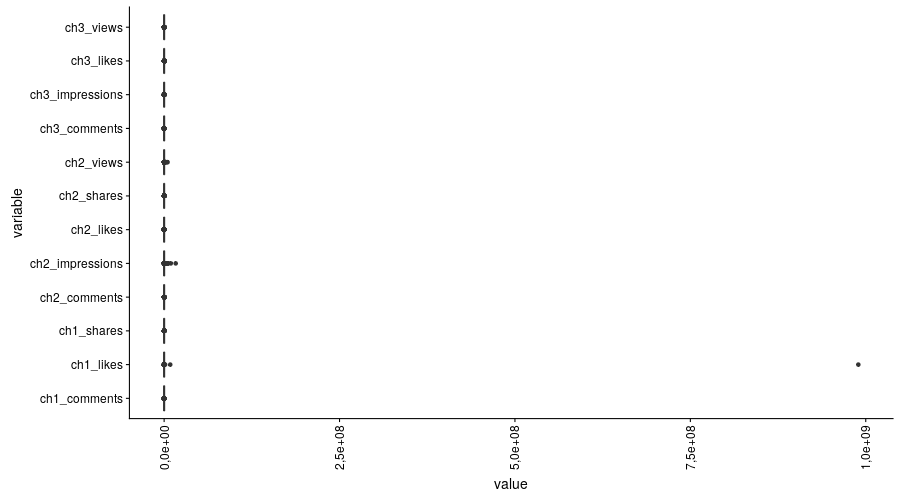

In [27]:
%%R -i dataset_long -w 900 -h 500 -u px
q1 <- qplot(variable, value,  data = dataset_long, geom = "boxplot") ## tHIS VALUE OCCURS IN MARCH
q1 <- q1 + ggpubr::rotate_x_text() + coord_flip()
q1

In [28]:
# SUSBTITUTE THE OUTLIER BY THE MEAN (just to see the rest of the data). Later we can decide if 
#we keep the value and apply log-transformations to scale the data (but this will depend of the analysis that we want to apply)
dataset_long.loc[dataset_long['value']  >= 100000000, 'value'] = dataset.ch1_likes.mean()

### We have high values in impressions and likes for channes 1 and 3. For now we let this be and continue with the analysis.

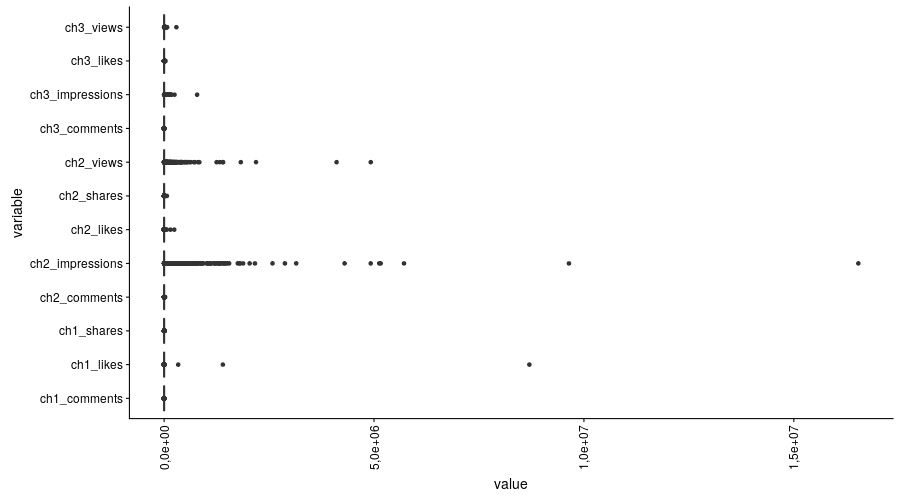

In [29]:
%%R -i dataset_long -w 900 -h 500 -u px
q1 <- qplot(variable, value,  data = dataset_long, geom = "boxplot")
q1 <- q1 + ggpubr::rotate_x_text() + coord_flip()
q1

In [30]:
dataset_long.head()

,channel,content_type,tag,id,published_date,variable,value,Month,year,day
0,CHANNEL2,COUNTRY,NORWAY,205162281,2019-01-01,ch2_likes,125.0,1,2019,1
1,CHANNEL1,COUNTRY,NORWAY,205162315,2019-01-01,ch2_likes,0.0,1,2019,1
2,CHANNEL1,SPORT,SWIMMING,205163332,2019-01-01,ch2_likes,0.0,1,2019,1
3,CHANNEL1,COUNTRY,NORWAY,205164246,2019-01-01,ch2_likes,0.0,1,2019,1
4,CHANNEL1,FORMAT,GFX,205164431,2019-01-01,ch2_likes,0.0,1,2019,1


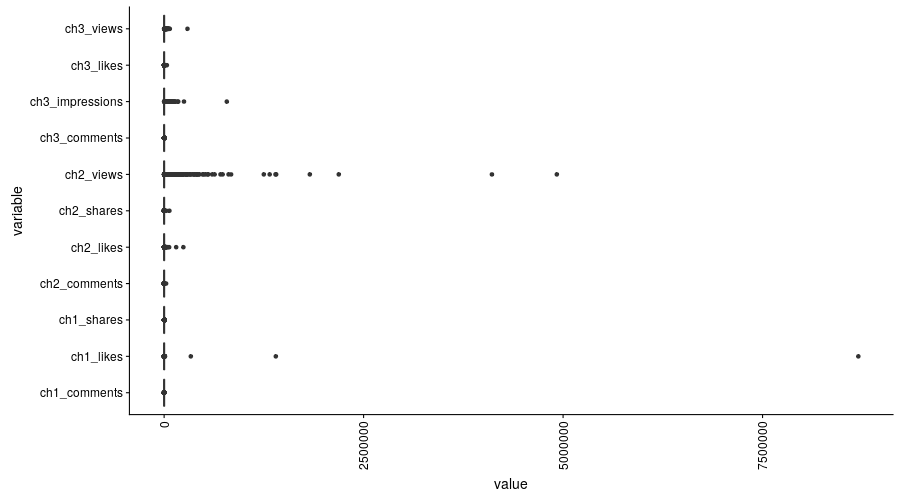

In [31]:
%%R -i dataset_long -w 900 -h 500 -u px
q1 <- qplot(variable  , value,  data = dataset_long %>% filter(variable != 'ch2_impressions'), geom = "boxplot")
q1 <- q1 + ggpubr::rotate_x_text() + coord_flip()
q1

## **with log**

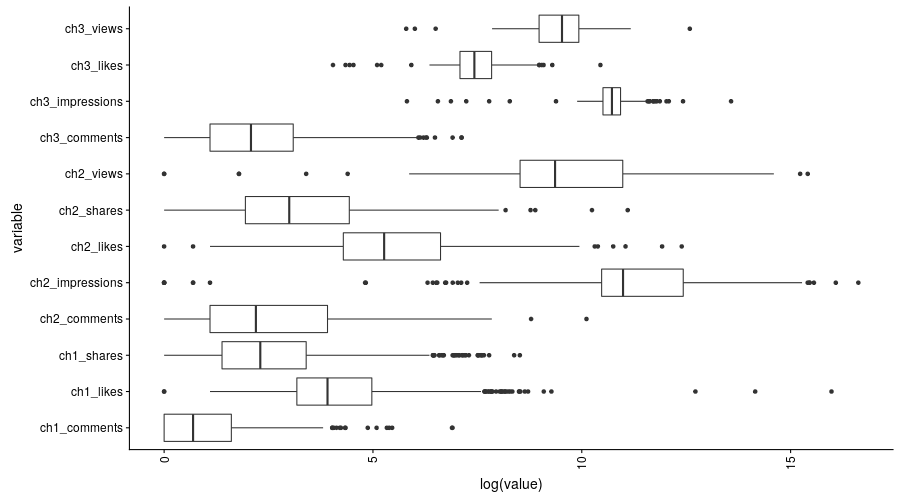

In [32]:
%%R -i dataset_long -w 900 -h 500 -u px
q1 <- qplot(variable, log(value),  data = dataset_long, geom = "boxplot")
q1 <- q1 + ggpubr::rotate_x_text() + coord_flip()
q1

In [33]:
dataset_long.head()

,channel,content_type,tag,id,published_date,variable,value,Month,year,day
0,CHANNEL2,COUNTRY,NORWAY,205162281,2019-01-01,ch2_likes,125.0,1,2019,1
1,CHANNEL1,COUNTRY,NORWAY,205162315,2019-01-01,ch2_likes,0.0,1,2019,1
2,CHANNEL1,SPORT,SWIMMING,205163332,2019-01-01,ch2_likes,0.0,1,2019,1
3,CHANNEL1,COUNTRY,NORWAY,205164246,2019-01-01,ch2_likes,0.0,1,2019,1
4,CHANNEL1,FORMAT,GFX,205164431,2019-01-01,ch2_likes,0.0,1,2019,1


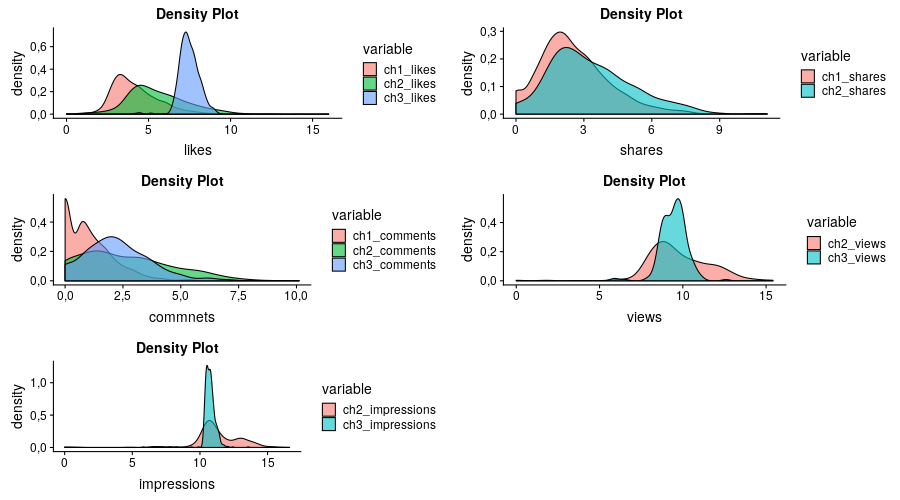

In [34]:
%%R -i dataset_long -w 900 -h 500 -u px

#+ scale_fill_grey(start = 0.1, end = .5) 

dataset_likes = dataset_long %>% filter(variable %in% c('ch1_likes', 'ch2_likes', 'ch3_likes'))
dataset_shares = dataset_long %>% filter(variable %in% c('ch1_shares', 'ch2_shares', 'ch3_shares'))
dataset_comments = dataset_long %>% filter(variable %in% c('ch1_comments', 'ch2_comments', 'ch3_comments'))
dataset_views = dataset_long %>% filter(variable %in% c('ch1_views', 'ch2_views', 'ch3_views'))
dataset_impressions = dataset_long %>% filter(variable %in% c('ch1_impressions', 'ch2_impressions', 'ch3_impressions'))
## density graphs
x1 = ggplot(dataset_likes, aes(x=log(value), fill=variable)) + geom_density(alpha = .6) + 
  labs(title="Density Plot", x="likes")
x2 = ggplot(dataset_shares, aes(x=log(value), fill=variable)) + geom_density(alpha = .6) + 
  labs(title="Density Plot", x="shares")
x3 = ggplot(dataset_comments, aes(x=log(value), fill=variable)) + geom_density(alpha = .6) + 
  labs(title="Density Plot", x="commnets")
x4 = ggplot(dataset_views, aes(x=log(value), fill=variable)) + geom_density(alpha = .6) + 
  labs(title="Density Plot", x="views")
x5 = ggplot(dataset_impressions, aes(x=log(value), fill=variable)) + geom_density(alpha = .6) + 
  labs(title="Density Plot", x="impressions")
gridExtra::grid.arrange(x1, x2, x3, x4, x5, ncol=2)   

# we are interested in engagements = likes + shares+ commnets by channel, date, content type, tag, id

In [35]:
dataset_long = dataset_long[dataset_long['variable'] != 'ch2_impressions']
dataset_long = dataset_long[dataset_long['variable'] != 'ch1_impressions']
dataset_long = dataset_long[dataset_long['variable'] != 'ch3_impressions']
dataset_long.head()

,channel,content_type,tag,id,published_date,variable,value,Month,year,day
0,CHANNEL2,COUNTRY,NORWAY,205162281,2019-01-01,ch2_likes,125.0,1,2019,1
1,CHANNEL1,COUNTRY,NORWAY,205162315,2019-01-01,ch2_likes,0.0,1,2019,1
2,CHANNEL1,SPORT,SWIMMING,205163332,2019-01-01,ch2_likes,0.0,1,2019,1
3,CHANNEL1,COUNTRY,NORWAY,205164246,2019-01-01,ch2_likes,0.0,1,2019,1
4,CHANNEL1,FORMAT,GFX,205164431,2019-01-01,ch2_likes,0.0,1,2019,1


In [36]:
data_eng = dataset_long.groupby(['channel', 'content_type', 'tag', 'id', 'published_date', 'Month', 'year', 'day'])['value'].sum().reset_index()
data_eng.head()

,channel,content_type,tag,id,published_date,Month,year,day,value
0,CHANNEL1,COUNTRY,ARGENTINA,206522181,2019-01-24,1,2019,24,73.0
1,CHANNEL1,COUNTRY,ARGENTINA,206733963,2019-01-28,1,2019,28,41.0
2,CHANNEL1,COUNTRY,ARGENTINA,210098420,2019-03-28,3,2019,28,0.0
3,CHANNEL1,COUNTRY,ARGENTINA,210114679,2019-03-29,3,2019,29,125.0
4,CHANNEL1,COUNTRY,ARGENTINA,210431436,2019-04-04,4,2019,4,1718.0


## **Engagement by channel**

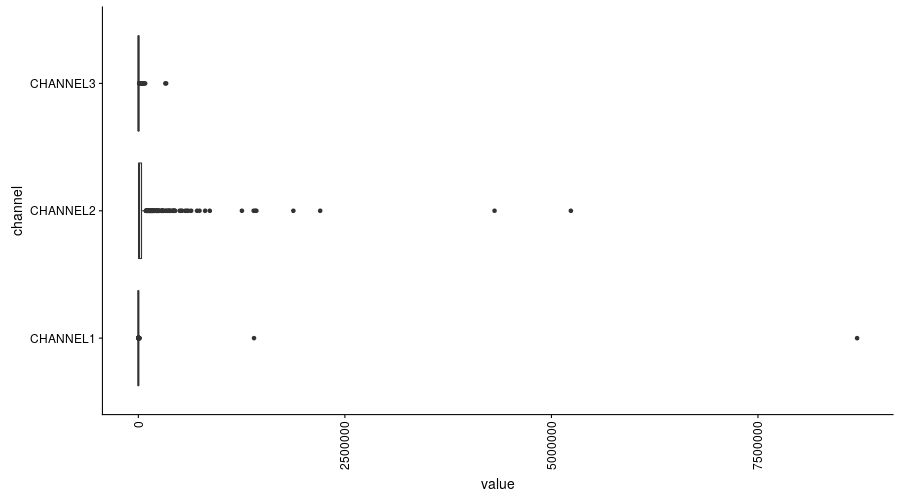

In [37]:
%%R -i data_eng -w 900 -h 500 -u px
q1 <- qplot(channel  , value,  data = data_eng, geom = "boxplot")
q1 <- q1 + ggpubr::rotate_x_text() + coord_flip()
q1

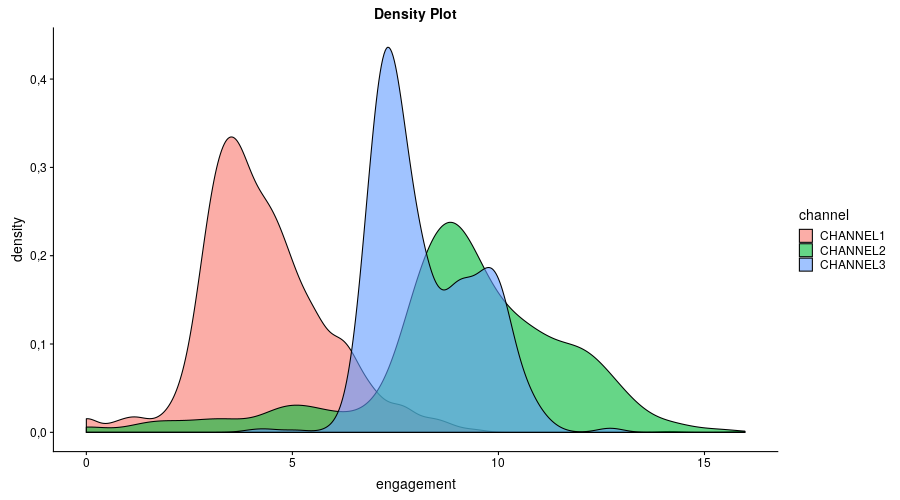

In [38]:
%%R -i data_eng -w 900 -h 500 -u px
x1 = ggplot(data_eng, aes(x=log(value), fill=channel)) + geom_density(alpha = .6) + 
  labs(title="Density Plot", x="engagement")
x1

## **Engagement by channel and by month**

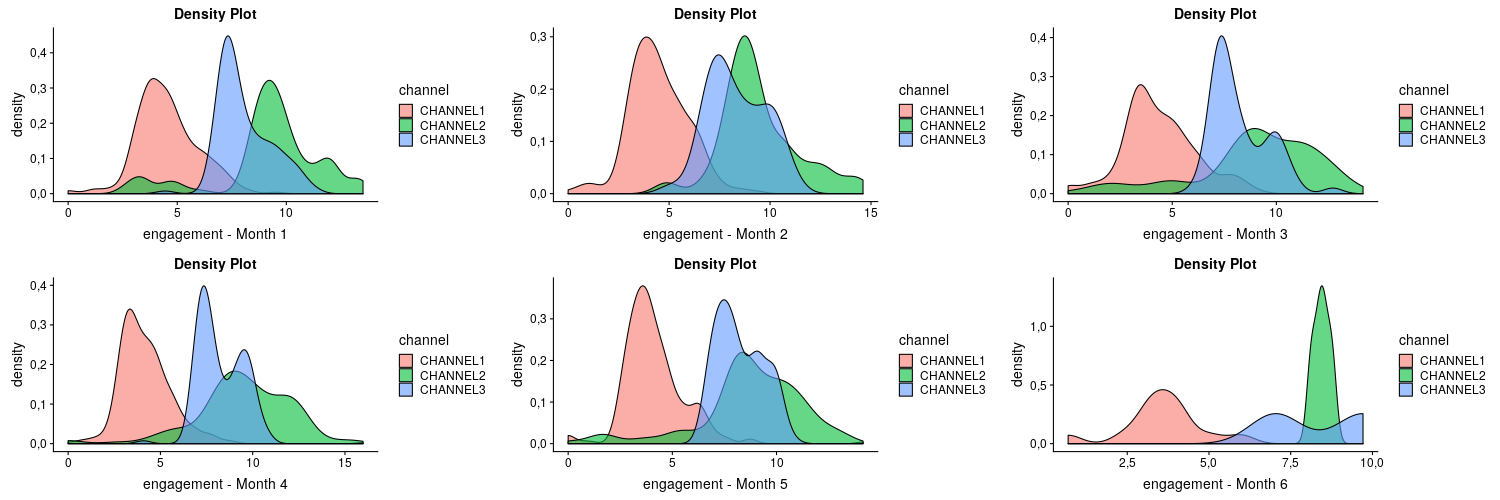

In [39]:
%%R -i data_eng -w 1500 -h 500 -u px
x1 = ggplot(data_eng %>% filter(Month == 1), aes(x=log(value), fill=channel)) + geom_density(alpha = .6) + 
  labs(title="Density Plot", x="engagement - Month 1")
x2 = ggplot(data_eng %>% filter(Month == 2), aes(x=log(value), fill=channel)) + geom_density(alpha = .6) + 
  labs(title="Density Plot", x="engagement - Month 2")
x3 = ggplot(data_eng %>% filter(Month == 3), aes(x=log(value), fill=channel)) + geom_density(alpha = .6) + 
  labs(title="Density Plot", x="engagement - Month 3")
x4 = ggplot(data_eng %>% filter(Month == 4), aes(x=log(value), fill=channel)) + geom_density(alpha = .6) + 
  labs(title="Density Plot", x="engagement - Month 4")
x5 = ggplot(data_eng %>% filter(Month == 5), aes(x=log(value), fill=channel)) + geom_density(alpha = .6) + 
  labs(title="Density Plot", x="engagement - Month 5")
x6 = ggplot(data_eng %>% filter(Month == 6), aes(x=log(value), fill=channel)) + geom_density(alpha = .6) + 
  labs(title="Density Plot", x="engagement - Month 6")

gridExtra::grid.arrange(x1, x2, x3, x4, x5, x6, ncol=3)  

## **Histogram**

In [40]:
%%R -i data_eng -w 1500 -h 500 -u px
data_eng %>% filter(id == '205182086')

   channel content_type      tag        id published_date Month year day value
1 CHANNEL1        SPORT SWIMMING 205182086     2019-01-01     1 2019   1    73


In [41]:
%%R -i data_eng -w 1500 -h 500 -u px
data_eng %>% filter(published_date == '2019-01-01') %>% head()
print(dim(data_eng))

[1] 2988    9


## **NUMBER OF POSTS**

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



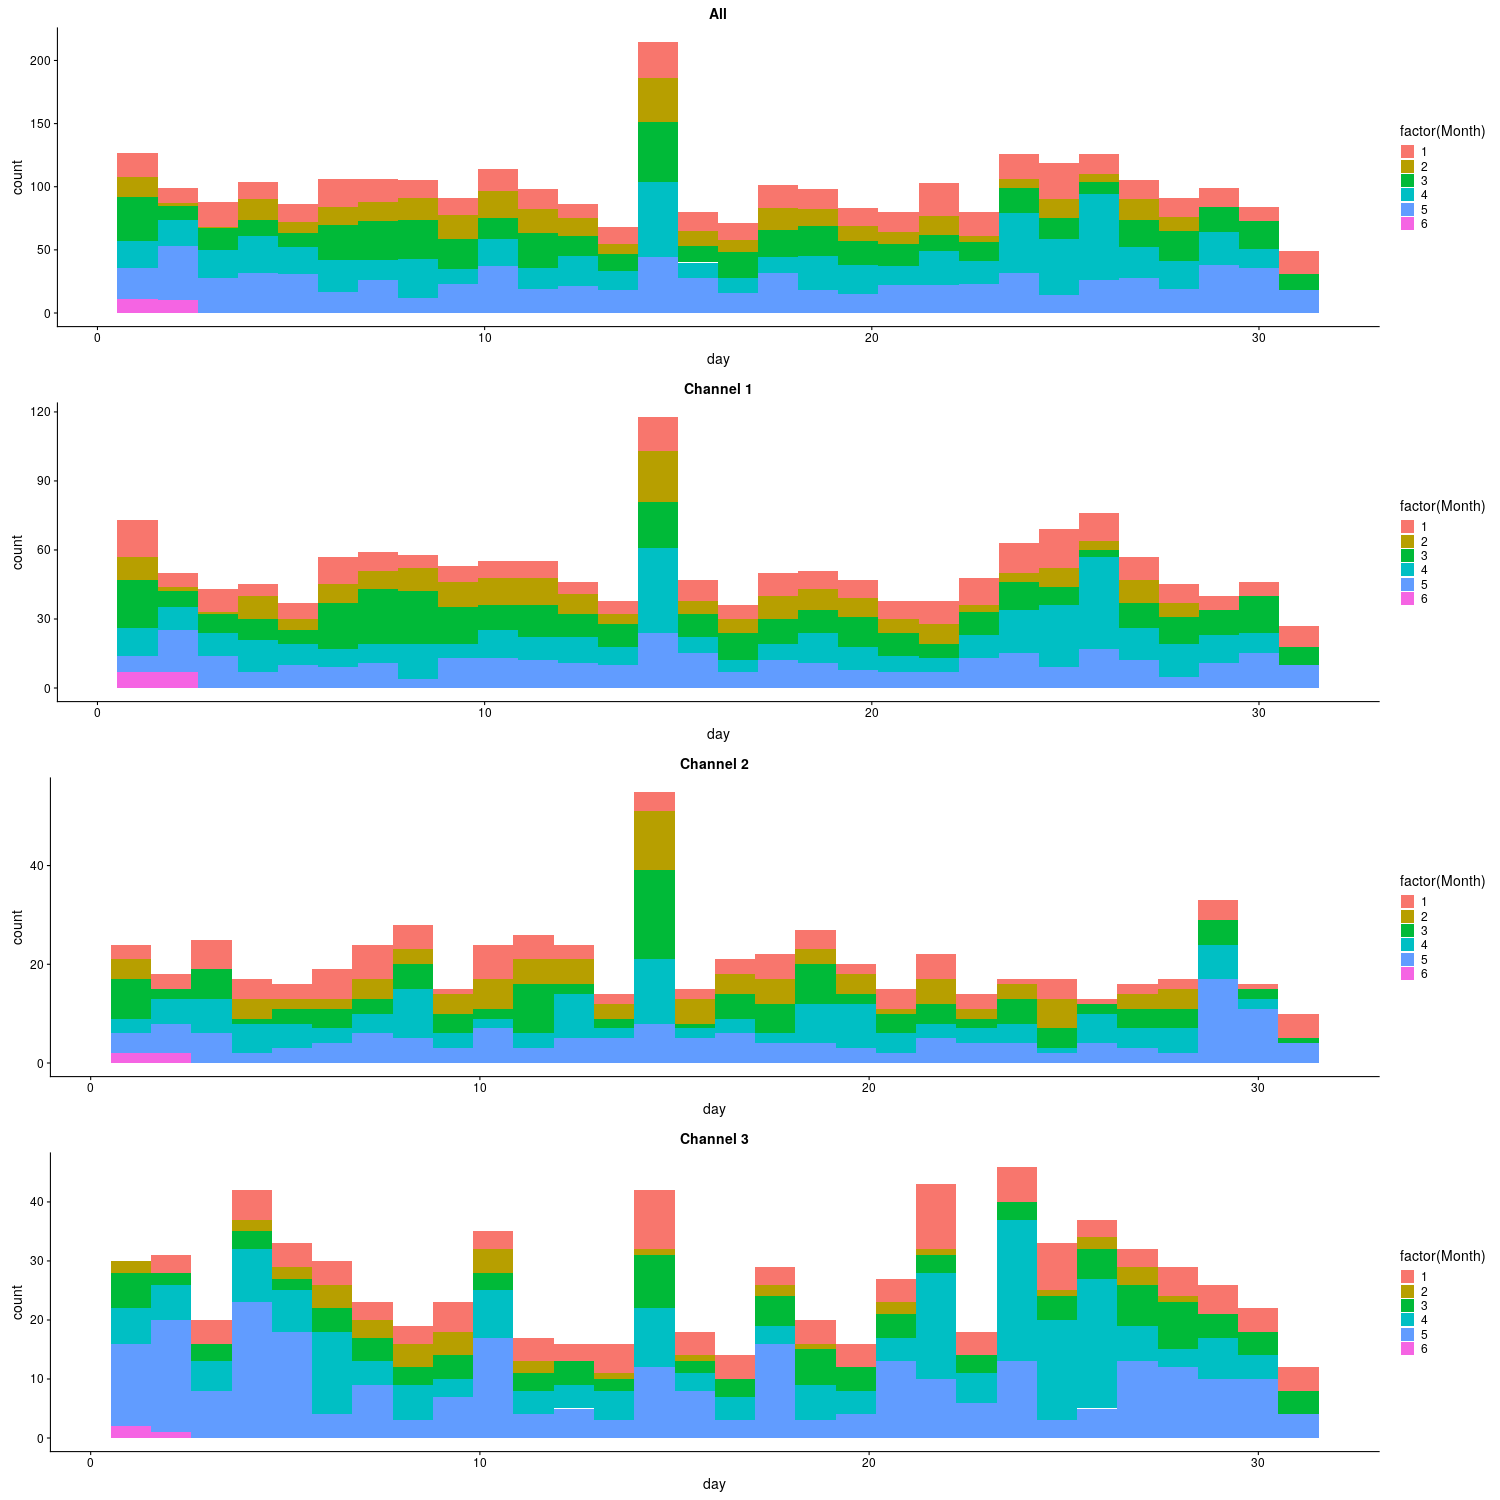

In [42]:
%%R -i data_eng -w 1500 -h 1500 -u px
c_all = ggplot(aes(x=day, fill = factor(Month)), data=data_eng) + geom_histogram()  + ggtitle('All')
channe1 = ggplot(aes(x=day, fill = factor(Month)), data=data_eng %>% filter(channel == 'CHANNEL1')) + geom_histogram() + ggtitle('Channel 1')
channe2 = ggplot(aes(x=day, fill = factor(Month)), data=data_eng %>% filter(channel == 'CHANNEL2')) + geom_histogram() + ggtitle('Channel 2')
channe3 = ggplot(aes(x=day, fill = factor(Month)), data=data_eng %>% filter(channel == 'CHANNEL3')) + geom_histogram() + ggtitle('Channel 3')
gridExtra::grid.arrange(c_all, channe1, channe2, channe3, ncol= 1)  

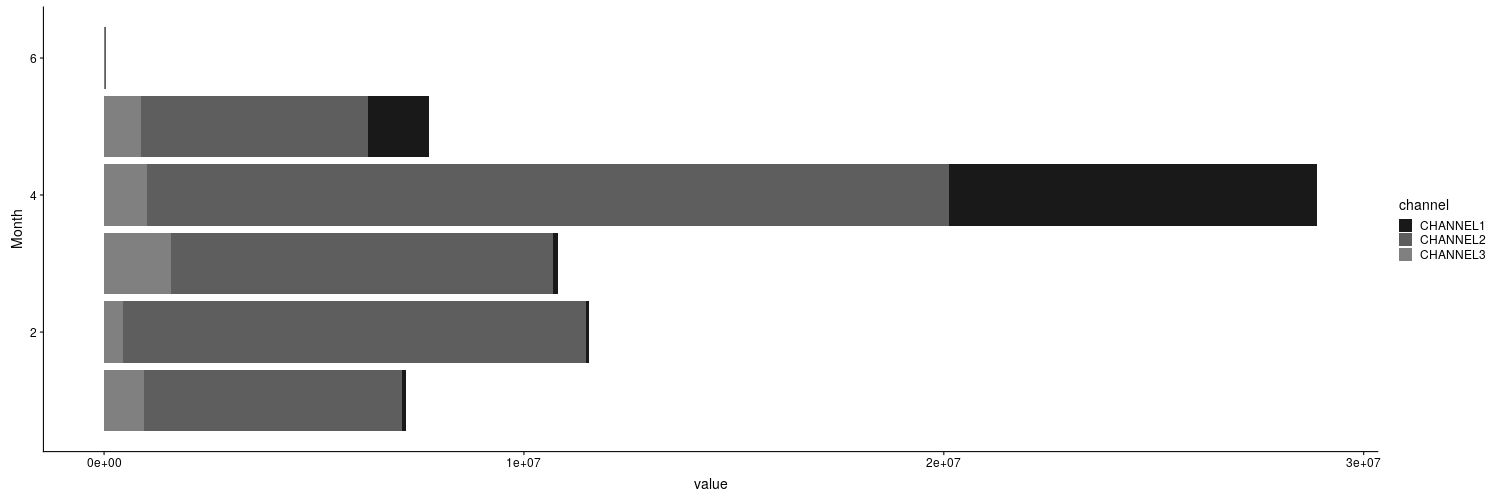

In [43]:
%%R -i data_eng -w 1500 -h 500 -u px
data_eng_ = data_eng %>% select(channel, Month, value)  %>% group_by(channel, Month) %>% summarize_all(sum) %>% mutate(var = paste0(channel, '-' , Month))
ggplot(data_eng_, aes(x = Month, y = value, fill = channel)) + geom_bar(stat="identity") + scale_fill_grey(start = 0.1, end = .5) + coord_flip() #content_type

In [44]:
#%%R -i dataset_group_day -w 1500 -h 500 -u px
#head(dataset_group_day)
#ggplot(data_eng_, aes(x = Month,fill = channel)) + geom_bar() + scale_fill_grey(start = 0.1, end = .5) + coord_flip() #content_typ
dataset_group_month = dataset_group_day[['Month', 'channel', 'number_posts_day']].groupby(['Month', 'channel'])['number_posts_day'].sum().reset_index()
dataset_group_month.head()

,Month,channel,number_posts_day
0,1,CHANNEL1,269
1,1,CHANNEL2,107
2,1,CHANNEL3,132
3,2,CHANNEL1,213
4,2,CHANNEL2,99


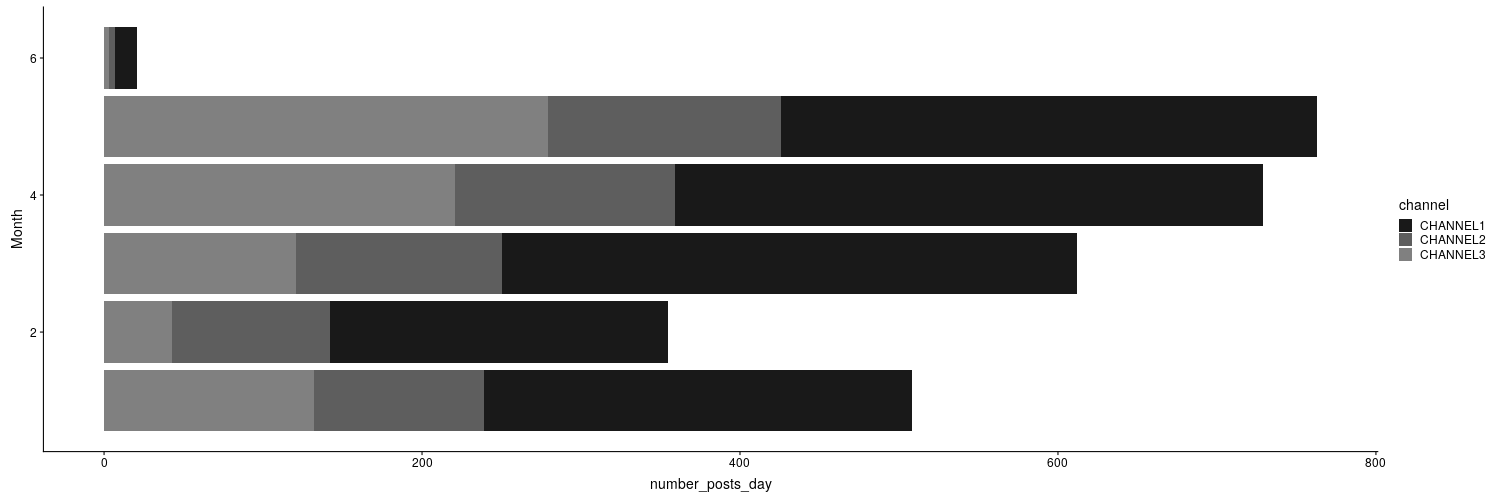

In [45]:
%%R -i dataset_group_month -w 1500 -h 500 -u px
#head(dataset_group_day)
ggplot(dataset_group_month, aes(x = Month, y = number_posts_day, fill = channel)) + geom_bar(stat="identity") + scale_fill_grey(start = 0.1, end = .5) + coord_flip() #content_typ

### Analysis by time

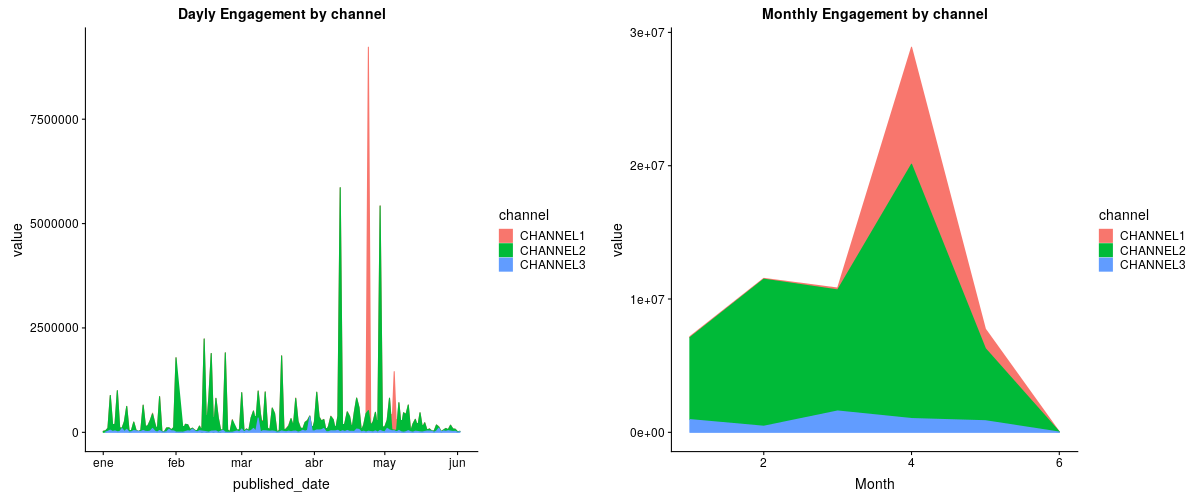

In [46]:
%%R -i data_eng -w 1200 -h 500 -u px

d <- ggplot(data_eng %>% select(channel, published_date, value)  %>% group_by(channel, published_date) %>% summarize_all(sum),
  aes(x = published_date, y = value)) + geom_area(aes(colour=channel, fill=channel)) + ggtitle('Dayly Engagement by channel')

d1 <- ggplot(data_eng %>% select(channel, Month, value)  %>% group_by(channel, Month) %>% summarize_all(sum),
  aes(x = Month, y = value)) + geom_area(aes(colour=channel, fill=channel)) + ggtitle('Monthly Engagement by channel')

gridExtra::grid.arrange(d, d1, ncol= 2)  


### DATA WITH LOG TRANSFORMATIONS: We can see the days where there are not too much engagement. End of march and beggining of april were good times for engagement. 

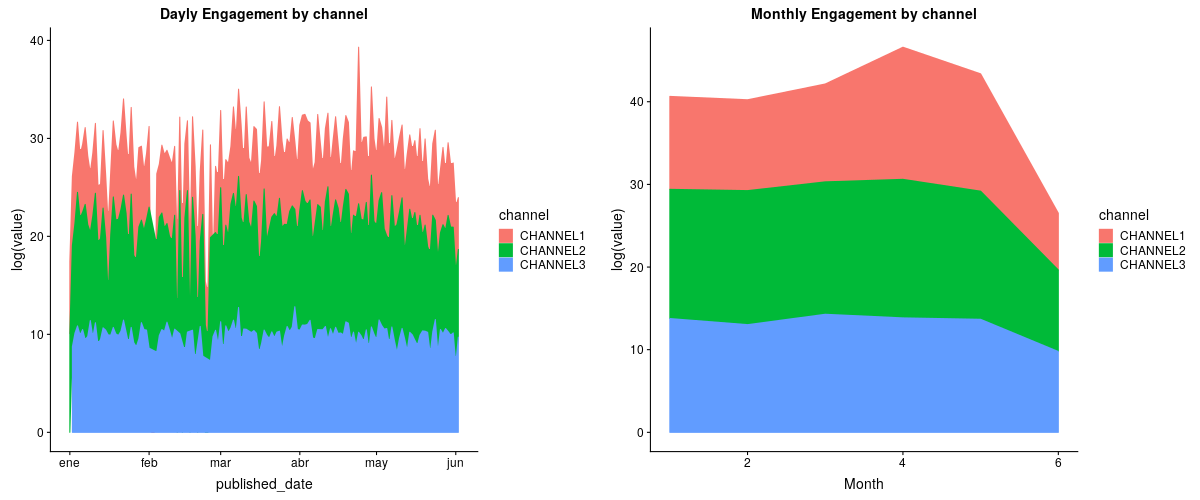

In [47]:
%%R -i data_eng -w 1200 -h 500 -u px

d <- ggplot(data_eng %>% select(channel, published_date, value)  %>% group_by(channel, published_date) %>% summarize_all(sum),
  aes(x = published_date, y = log(value))) + geom_area(aes(colour=channel, fill=channel)) + ggtitle('Dayly Engagement by channel')

d1 <- ggplot(data_eng %>% select(channel, Month, value)  %>% group_by(channel, Month) %>% summarize_all(sum),
  aes(x = Month, y = log(value))) + geom_area(aes(colour=channel, fill=channel)) + ggtitle('Monthly Engagement by channel')

gridExtra::grid.arrange(d, d1, ncol= 2)  

## **DATA CLEANING**

The number one rule we follow is: “Your model will only ever be as good as your data. **A clean dataset will allow a model to learn meaningful features and not overfit on irrelevant noise.**

We do some cleaning during the exploratory analysis, by it is necessary to explore more to finish this phase.

## **FEATURING ENGINEERING**

* We aggregate data to create the engagement variable. Although, there are several metrics that we can also create to understand the situation. For example:
* **LIKE RATE** Divide likes by impressions. This stat can help you predict the success of a piece of content.
* **Engagement rate**  the number of engagements divided by impressions.  Out of everyone who saw the tweet, what percentage of people did something with it.

## **LIMITATIONS**

* Time limitations

## **FURTHER STEPS**

* Use other tools for cleaning data: like talend.
* Group content based in historical information to improve the content and get more viral.
* Predict number of followers in the next week, year, or month.
* Analyse when it is a good time to launch new content (hour of the day, day of the week, etc.)

In [52]:
# ------------------------------------------------------------------------------------------------------------------------------------

## **APPENDIX**

## **SOCIAL MEDIA METRICS**

Social media metrics are important because they prove you can measure how successful a campaign is, how well your social strategy is performing, and ultimately if you will have an impact on your overall business. Not only does having these metrics give you an opportunity to showcase the impact of your work to executives, but providing consistent social media metric reports can lead to major shifts for your social team, including budget increases and increased access to resources. And last but certainly not least, metrics keep you aware of general social profile and brand health – you don’t know the impact of your social media presence until you have the data to back it up.


AGGREGATE DATA FROM DIFFERENT SOCIAL NETWORKS
* IMPRESIONS
* ENGAGEMENTS
* LINK CLICKS
* **Engagement** how much audience accounts are interacting with your account and how often: TOTAL VALUES, GRAPHS OF Retweets vs. Shares.eTC .. =RETWEETS + REPLIES + SHARES +LIKES + COMMENTS
* **Engagement rate**  the number of engagements divided by impressions.  Out of everyone who saw the tweet, what percentage of people did something with it.
* Likes, Comments, Retweets, etc.: Individual engagement metrics like a Share or a Retweet add up. In a Twitter report, you’ll see a total number of engagements per post or profile.
* Post engagement rate: The number of engagements divided by impressions or reach. A high rate means the people who see the post find it interesting.
* Account mentions: Organic mentions, like @mentions that aren’t part of a reply, or tagging a brand in an Instagram story without prompting, indicate good brand awareness.
* **Impressions** are how many times a post shows up in someone’s timeline
* **Reach** is the potential unique viewers a post could have (usually your follower count plus accounts that shared the post’s follower counts -  we would need to add up every account that Retweeted it and their follower counts).
* Reach is the number of people who may have seen your content, while impressions are the total number of times your content was displayed to people.
* cOMBINATION OF IMPRESSIONS + ENGAGMEENT + REACH: For a post that has a high impressions count but a low engagement number (and therefore a low engagement rate), it likely means that your post wasn’t interesting enough for audiences to take action after seeing it in their feed. For a post with a high reach count and high engagement rate, it’ll likely mean that the content went viral via Retweets and Shares.
* Share of voice is a metric often used in public relations, or as part of a competitive analysis or paid advertising campaign. It indicates how much of the online sphere your brand is taking part in. 
* sOCIAL TRAFIC: number of people taht interat with the different social networks (facebook, twitter, etc)
* Conversions is when someone purchases something from your site. A social conversion means they visited via a social media channel and then purchased something in that same visit.
* INBOUND VS REPLIES --> CUSTOMER EXPERIENCE, TIME TO RESPONSE...
* **As reach increases, it naturally leads to increased awareness.** 
* tRENDING TOPICS.
*Net followers = #likes - #unlikes
* lIKE RATE: Divide likes by impressions. tHIS stat that can help you predict the success of a piece of content.
* Tweet length vs. engagement
* Basically, what time of day is best to post in order that the most people will see a tweet?
*What is the best posting time to maximize engagement rate?
*Which day of the week is best for engagement?

** Read***
https://buffer.com/library/twitter-analytics
**Data**
https://docs.google.com/spreadsheets/d/1uPBTYqrluW9EHZal_v9SbEOq9bLPW6fevYYUapHTdcg/edit#gid=0